In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

In [2]:
df_csv = pd.read_csv("iris.csv")
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df_csv.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_csv1=df_csv.drop("Id",axis=1) # Dropping the Id column as it is not required 
df_csv1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_csv1.isnull().sum() # checking for null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
sp_count=df_csv1["Species"].value_counts()
sp_count

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

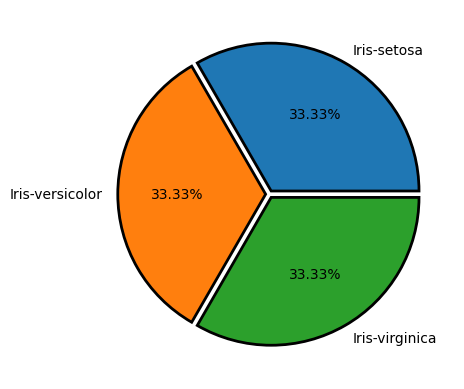

In [7]:
labels = sp_count.index
counts = sp_count.values
space = [0.025, 0.025, 0.025]

plt.pie(counts, labels=labels,explode = space, autopct='%.2f%%',wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
plt.show()

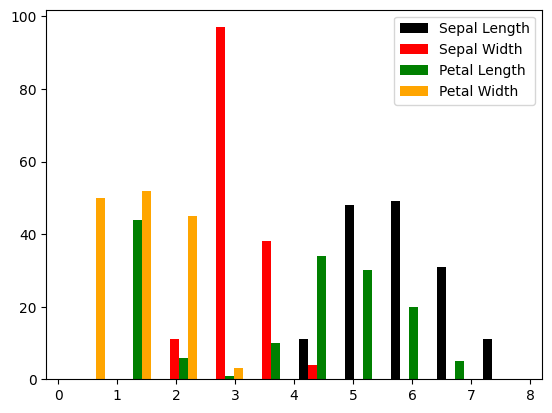

In [8]:
colors=['Black', 'Red','Green','Orange']
labels=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
plt.hist(df_csv1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']],
         color=colors, label=labels)
plt.legend()

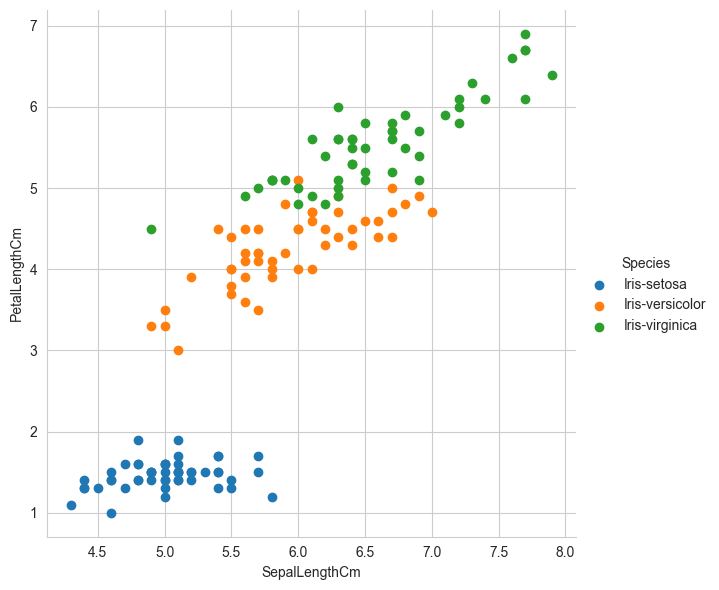

In [9]:
sb.set_style("whitegrid")
 
sb.FacetGrid(df_csv1, hue ="Species",height = 6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

<Axes: >

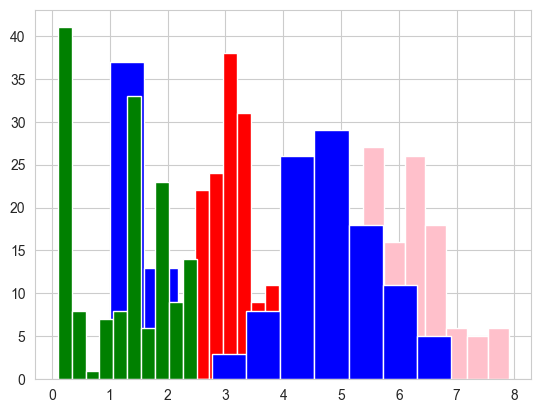

In [10]:
#Plotting histogram for all the features 
df_csv1['SepalLengthCm'].hist(color='pink')
df_csv1['SepalWidthCm'].hist(color='red')
df_csv1['PetalLengthCm'].hist(color='blue')
df_csv1['PetalWidthCm'].hist(color='green')

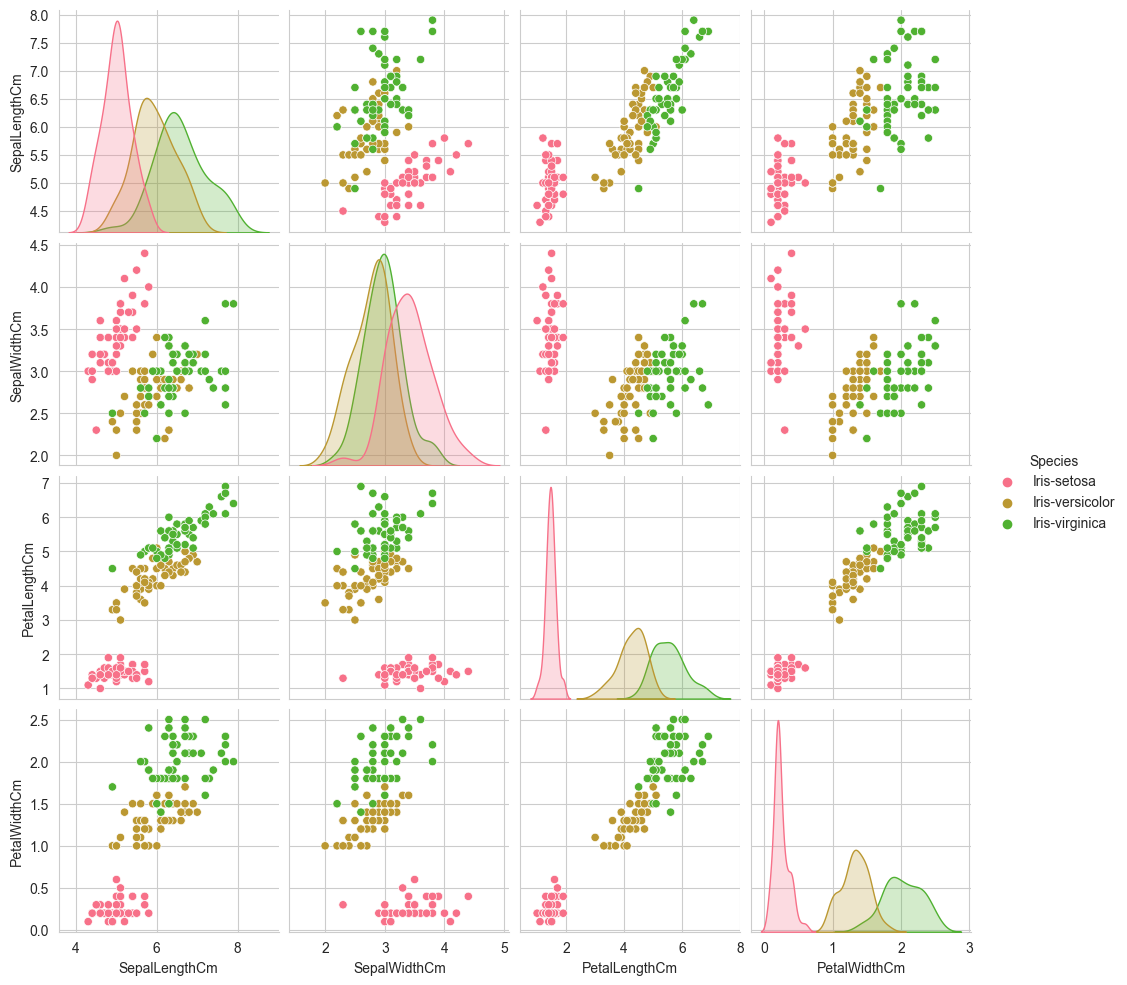

In [11]:
sb.set_palette("husl")
sb.pairplot(df_csv1,hue = "Species",diag_kind ="kde",kind = "scatter")
plt.show()

In [12]:
# Computing the correlation matrix
df_csv1.corr()

C:\Users\Navanil Ghosh\AppData\Local\Temp\ipykernel_23832\3521624239.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_csv1.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\Navanil Ghosh\AppData\Local\Temp\ipykernel_23832\574608406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_csv1.corr()


<Axes: >

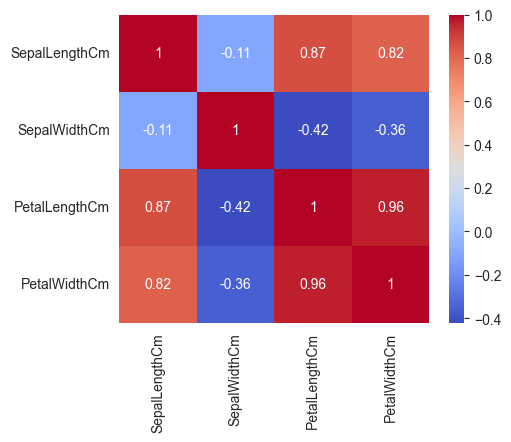

In [13]:
corr = df_csv1.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sb.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [14]:
X = df_csv1.drop('Species',axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_csv1['Species'] = label_encoder.fit_transform(df_csv1['Species'])
df_csv1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Model Trainnig

In [16]:
X = df_csv1.drop(columns=['Species'])
Y = df_csv1['Species']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35,random_state=1)

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(x_train,y_train)

log_acc = log.score(x_test, y_test)

log_per = log_acc*100

print("Accuracy :- ", log_per)

y_pred_log= log.predict(x_test)

Accuracy :-  98.11320754716981


## K-nearest model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

knn_acc = knn.score(x_test, y_test)

knn_per = knn_acc*100

print("Accuracy (KNN): ",knn_per)

y_pred_knn= knn.predict(x_test)

Accuracy (KNN):  98.11320754716981


## Confusion Matrix 

In [20]:
from sklearn.metrics import confusion_matrix

con_matrix_log=confusion_matrix(y_test,y_pred_log)
con_matrix_knn=confusion_matrix(y_test,y_pred_knn)

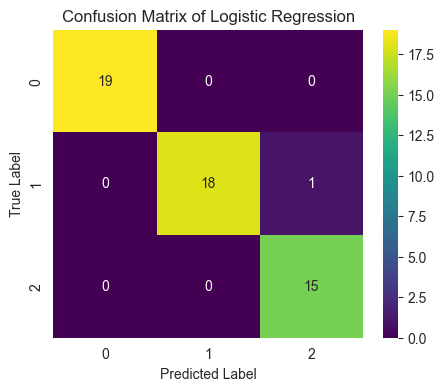

In [21]:
#Confusion Matrix of Logistic Regression

plt.figure(figsize=(5,4))

sb.heatmap(con_matrix_log,annot=True,cmap='viridis')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

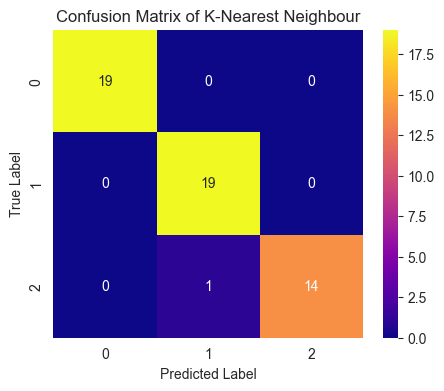

In [22]:
#Confusion Matrix of Logistic Regression

plt.figure(figsize=(5,4))

sb.heatmap(con_matrix_knn,annot=True,cmap='plasma')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of K-Nearest Neighbour')
plt.show()

## Model Comparison 

Text(0.5, 1.0, 'Model Comparison - Accuracy')

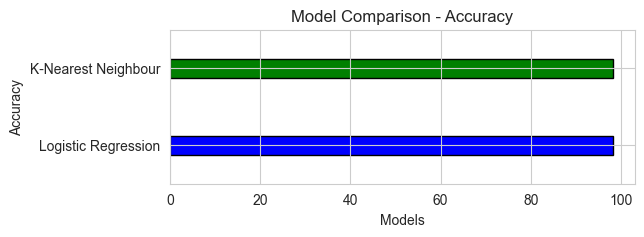

In [23]:
com_models = ['Logistic Regression', 'K-Nearest Neighbour']
models_acc = [log_per,knn_per]

fig, ax = plt.subplots(figsize=(6, 2))

ax.barh(com_models, models_acc, color=['blue', 'green'],height=0.25, edgecolor='black', linewidth=1, zorder=0)

plt.ylim(-0.5, 1.5)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")